In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [3]:
x.shape, b.shape, A.shape

((10000L,), (10000L,), (10000L, 2L))

# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ m \times n $ matrix $A$ and a $ m \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^n$ which minimizes the objective function $$f(x) = \frac{1}{2m} \sum_{i=1}^{n} (a_i^Tx - b_i)^2 = \frac{1}{2m} \|Ax - b\|^2 $$

One can see the function is $\mu$ strongly convex with $\mu = \lambda_{min}(\nabla^2 f(x))$ and $L$ smooth with $L = \lambda_{max}(\nabla^2 f(x)$. 

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

First calculate the $\nabla^2 f(x)$:
\begin{align}
    \nabla f(x) &=\frac{1}{m}A^{T}\left(Ax - b\right) \\
    \nabla^2 f(x) &=\frac{1}{m}A^{T}A
\end{align}


# Compute $\mu$ and $L$

In [4]:
def calculate_mu_L(b, A):
    """Calculate the strongly convex constant and smoothness constant for f"""
    dfdf = A.T.dot(A)/len(b)
    mu = np.min(dfdf)
    L = np.max(dfdf)
    return mu, L

# Computing the Objective Function
Fill in the `compute_cost` function below:

In [5]:
def calculate_mse(e):
    """Calculate the mean squared error for vector e."""
    return (e**2).sum()/len(e)

def calculate_mae(e):
    """Calculate the mean absolute error for vector e."""
    return (np.abs(e)).sum()/len(e)

def compute_loss(b, A, x):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = b - A.dot(x)
    return calculate_mse(e)

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [6]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    grad = A.T.dot(A.dot(x)-b)/len(b)
    loss = compute_loss(b, A, x)
    return grad, loss

Please fill in the functions `gradient_descent` below:

In [7]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and loss
    xs = [initial_x]
    losses = []
    x = initial_x.copy()
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad, loss = compute_gradient(b, A, x)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by gradient
        # ***************************************************
        x -= gamma*grad
        # store x and loss
        xs.append(x)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return losses, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [8]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
mu, L = calculate_mu_L(b, A)
gamma = 0.7
print(mu)
print(L)
# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

-1.24131815937e-15
1.0
Gradient Descent(0/49): loss=5584.47342552
Gradient Descent(1/49): loss=530.604924218
Gradient Descent(2/49): loss=75.7567591009
Gradient Descent(3/49): loss=34.8204242403
Gradient Descent(4/49): loss=31.1361541029
Gradient Descent(5/49): loss=30.8045697905
Gradient Descent(6/49): loss=30.7747272024
Gradient Descent(7/49): loss=30.7720413695
Gradient Descent(8/49): loss=30.7717996445
Gradient Descent(9/49): loss=30.7717778893
Gradient Descent(10/49): loss=30.7717759313
Gradient Descent(11/49): loss=30.7717757551
Gradient Descent(12/49): loss=30.7717757392
Gradient Descent(13/49): loss=30.7717757378
Gradient Descent(14/49): loss=30.7717757377
Gradient Descent(15/49): loss=30.7717757377
Gradient Descent(16/49): loss=30.7717757377
Gradient Descent(17/49): loss=30.7717757377
Gradient Descent(18/49): loss=30.7717757377
Gradient Descent(19/49): loss=30.7717757377
Gradient Descent(20/49): loss=30.7717757377
Gradient Descent(21/49): loss=30.7717757377
Gradient Descent(22

Time Visualization

<function __main__.plot_figure>

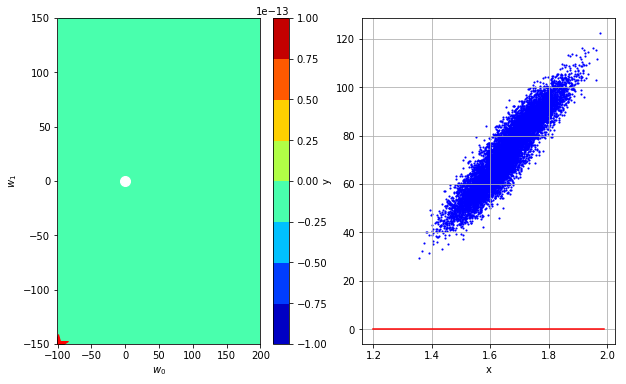

In [9]:
#Time Visualization
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_losses = grid_search(b, A, grid_x0, grid_x1)
    loss_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_losses)
    
    fig = gradient_descent_visualization(
        gradient_losses_naive, gradient_xs_naive, grid_losses, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

Try doing gradient descent with a better learning rate

In [10]:
1/L

1.0

In [11]:
# Define the parameters of the algorithm.
max_iters = 5000

gamma = 0.01 #Fill in a better learning rate  

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/4999): loss=5584.47342552
Gradient Descent(1/4999): loss=5473.95476269
Gradient Descent(2/4999): loss=5365.63542125
Gradient Descent(3/4999): loss=5259.4716347
Gradient Descent(4/4999): loss=5155.42050751
Gradient Descent(5/4999): loss=5053.43999775
Gradient Descent(6/4999): loss=4953.48890013
Gradient Descent(7/4999): loss=4855.52682935
Gradient Descent(8/4999): loss=4759.51420379
Gradient Descent(9/4999): loss=4665.41222947
Gradient Descent(10/4999): loss=4573.18288444
Gradient Descent(11/4999): loss=4482.78890338
Gradient Descent(12/4999): loss=4394.19376254
Gradient Descent(13/4999): loss=4307.361665
Gradient Descent(14/4999): loss=4222.2575262
Gradient Descent(15/4999): loss=4138.84695977
Gradient Descent(16/4999): loss=4057.09626361
Gradient Descent(17/4999): loss=3976.9724063
Gradient Descent(18/4999): loss=3898.44301375
Gradient Descent(19/4999): loss=3821.47635611
Gradient Descent(20/4999): loss=3746.04133496
Gradient Descent(21/4999): loss=3672.10747073
Gra

Gradient Descent(499/4999): loss=31.0164040694
Gradient Descent(500/4999): loss=31.0115359656
Gradient Descent(501/4999): loss=31.0067647371
Gradient Descent(502/4999): loss=31.002088456
Gradient Descent(503/4999): loss=30.9975052329
Gradient Descent(504/4999): loss=30.993013216
Gradient Descent(505/4999): loss=30.9886105901
Gradient Descent(506/4999): loss=30.9842955766
Gradient Descent(507/4999): loss=30.9800664318
Gradient Descent(508/4999): loss=30.975921447
Gradient Descent(509/4999): loss=30.9718589473
Gradient Descent(510/4999): loss=30.9678772915
Gradient Descent(511/4999): loss=30.9639748706
Gradient Descent(512/4999): loss=30.9601501078
Gradient Descent(513/4999): loss=30.9564014578
Gradient Descent(514/4999): loss=30.952727406
Gradient Descent(515/4999): loss=30.9491264678
Gradient Descent(516/4999): loss=30.9455971883
Gradient Descent(517/4999): loss=30.9421381414
Gradient Descent(518/4999): loss=30.9387479296
Gradient Descent(519/4999): loss=30.935425183
Gradient Descent(5

Gradient Descent(1037/4999): loss=30.7717806578
Gradient Descent(1038/4999): loss=30.7717805599
Gradient Descent(1039/4999): loss=30.7717804639
Gradient Descent(1040/4999): loss=30.7717803699
Gradient Descent(1041/4999): loss=30.7717802777
Gradient Descent(1042/4999): loss=30.7717801873
Gradient Descent(1043/4999): loss=30.7717800988
Gradient Descent(1044/4999): loss=30.771780012
Gradient Descent(1045/4999): loss=30.7717799269
Gradient Descent(1046/4999): loss=30.7717798436
Gradient Descent(1047/4999): loss=30.7717797619
Gradient Descent(1048/4999): loss=30.7717796818
Gradient Descent(1049/4999): loss=30.7717796033
Gradient Descent(1050/4999): loss=30.7717795264
Gradient Descent(1051/4999): loss=30.771779451
Gradient Descent(1052/4999): loss=30.7717793771
Gradient Descent(1053/4999): loss=30.7717793047
Gradient Descent(1054/4999): loss=30.7717792337
Gradient Descent(1055/4999): loss=30.7717791641
Gradient Descent(1056/4999): loss=30.7717790959
Gradient Descent(1057/4999): loss=30.77177

Gradient Descent(1583/4999): loss=30.7717757377
Gradient Descent(1584/4999): loss=30.7717757377
Gradient Descent(1585/4999): loss=30.7717757377
Gradient Descent(1586/4999): loss=30.7717757377
Gradient Descent(1587/4999): loss=30.7717757377
Gradient Descent(1588/4999): loss=30.7717757377
Gradient Descent(1589/4999): loss=30.7717757377
Gradient Descent(1590/4999): loss=30.7717757377
Gradient Descent(1591/4999): loss=30.7717757377
Gradient Descent(1592/4999): loss=30.7717757377
Gradient Descent(1593/4999): loss=30.7717757377
Gradient Descent(1594/4999): loss=30.7717757377
Gradient Descent(1595/4999): loss=30.7717757377
Gradient Descent(1596/4999): loss=30.7717757377
Gradient Descent(1597/4999): loss=30.7717757377
Gradient Descent(1598/4999): loss=30.7717757377
Gradient Descent(1599/4999): loss=30.7717757377
Gradient Descent(1600/4999): loss=30.7717757377
Gradient Descent(1601/4999): loss=30.7717757377
Gradient Descent(1602/4999): loss=30.7717757377
Gradient Descent(1603/4999): loss=30.771

Gradient Descent(2077/4999): loss=30.7717757377
Gradient Descent(2078/4999): loss=30.7717757377
Gradient Descent(2079/4999): loss=30.7717757377
Gradient Descent(2080/4999): loss=30.7717757377
Gradient Descent(2081/4999): loss=30.7717757377
Gradient Descent(2082/4999): loss=30.7717757377
Gradient Descent(2083/4999): loss=30.7717757377
Gradient Descent(2084/4999): loss=30.7717757377
Gradient Descent(2085/4999): loss=30.7717757377
Gradient Descent(2086/4999): loss=30.7717757377
Gradient Descent(2087/4999): loss=30.7717757377
Gradient Descent(2088/4999): loss=30.7717757377
Gradient Descent(2089/4999): loss=30.7717757377
Gradient Descent(2090/4999): loss=30.7717757377
Gradient Descent(2091/4999): loss=30.7717757377
Gradient Descent(2092/4999): loss=30.7717757377
Gradient Descent(2093/4999): loss=30.7717757377
Gradient Descent(2094/4999): loss=30.7717757377
Gradient Descent(2095/4999): loss=30.7717757377
Gradient Descent(2096/4999): loss=30.7717757377
Gradient Descent(2097/4999): loss=30.771

Gradient Descent(2586/4999): loss=30.7717757377
Gradient Descent(2587/4999): loss=30.7717757377
Gradient Descent(2588/4999): loss=30.7717757377
Gradient Descent(2589/4999): loss=30.7717757377
Gradient Descent(2590/4999): loss=30.7717757377
Gradient Descent(2591/4999): loss=30.7717757377
Gradient Descent(2592/4999): loss=30.7717757377
Gradient Descent(2593/4999): loss=30.7717757377
Gradient Descent(2594/4999): loss=30.7717757377
Gradient Descent(2595/4999): loss=30.7717757377
Gradient Descent(2596/4999): loss=30.7717757377
Gradient Descent(2597/4999): loss=30.7717757377
Gradient Descent(2598/4999): loss=30.7717757377
Gradient Descent(2599/4999): loss=30.7717757377
Gradient Descent(2600/4999): loss=30.7717757377
Gradient Descent(2601/4999): loss=30.7717757377
Gradient Descent(2602/4999): loss=30.7717757377
Gradient Descent(2603/4999): loss=30.7717757377
Gradient Descent(2604/4999): loss=30.7717757377
Gradient Descent(2605/4999): loss=30.7717757377
Gradient Descent(2606/4999): loss=30.771

Gradient Descent(3139/4999): loss=30.7717757377
Gradient Descent(3140/4999): loss=30.7717757377
Gradient Descent(3141/4999): loss=30.7717757377
Gradient Descent(3142/4999): loss=30.7717757377
Gradient Descent(3143/4999): loss=30.7717757377
Gradient Descent(3144/4999): loss=30.7717757377
Gradient Descent(3145/4999): loss=30.7717757377
Gradient Descent(3146/4999): loss=30.7717757377
Gradient Descent(3147/4999): loss=30.7717757377
Gradient Descent(3148/4999): loss=30.7717757377
Gradient Descent(3149/4999): loss=30.7717757377
Gradient Descent(3150/4999): loss=30.7717757377
Gradient Descent(3151/4999): loss=30.7717757377
Gradient Descent(3152/4999): loss=30.7717757377
Gradient Descent(3153/4999): loss=30.7717757377
Gradient Descent(3154/4999): loss=30.7717757377
Gradient Descent(3155/4999): loss=30.7717757377
Gradient Descent(3156/4999): loss=30.7717757377
Gradient Descent(3157/4999): loss=30.7717757377
Gradient Descent(3158/4999): loss=30.7717757377
Gradient Descent(3159/4999): loss=30.771

Gradient Descent(3649/4999): loss=30.7717757377
Gradient Descent(3650/4999): loss=30.7717757377
Gradient Descent(3651/4999): loss=30.7717757377
Gradient Descent(3652/4999): loss=30.7717757377
Gradient Descent(3653/4999): loss=30.7717757377
Gradient Descent(3654/4999): loss=30.7717757377
Gradient Descent(3655/4999): loss=30.7717757377
Gradient Descent(3656/4999): loss=30.7717757377
Gradient Descent(3657/4999): loss=30.7717757377
Gradient Descent(3658/4999): loss=30.7717757377
Gradient Descent(3659/4999): loss=30.7717757377
Gradient Descent(3660/4999): loss=30.7717757377
Gradient Descent(3661/4999): loss=30.7717757377
Gradient Descent(3662/4999): loss=30.7717757377
Gradient Descent(3663/4999): loss=30.7717757377
Gradient Descent(3664/4999): loss=30.7717757377
Gradient Descent(3665/4999): loss=30.7717757377
Gradient Descent(3666/4999): loss=30.7717757377
Gradient Descent(3667/4999): loss=30.7717757377
Gradient Descent(3668/4999): loss=30.7717757377
Gradient Descent(3669/4999): loss=30.771

Gradient Descent(4191/4999): loss=30.7717757377
Gradient Descent(4192/4999): loss=30.7717757377
Gradient Descent(4193/4999): loss=30.7717757377
Gradient Descent(4194/4999): loss=30.7717757377
Gradient Descent(4195/4999): loss=30.7717757377
Gradient Descent(4196/4999): loss=30.7717757377
Gradient Descent(4197/4999): loss=30.7717757377
Gradient Descent(4198/4999): loss=30.7717757377
Gradient Descent(4199/4999): loss=30.7717757377
Gradient Descent(4200/4999): loss=30.7717757377
Gradient Descent(4201/4999): loss=30.7717757377
Gradient Descent(4202/4999): loss=30.7717757377
Gradient Descent(4203/4999): loss=30.7717757377
Gradient Descent(4204/4999): loss=30.7717757377
Gradient Descent(4205/4999): loss=30.7717757377
Gradient Descent(4206/4999): loss=30.7717757377
Gradient Descent(4207/4999): loss=30.7717757377
Gradient Descent(4208/4999): loss=30.7717757377
Gradient Descent(4209/4999): loss=30.7717757377
Gradient Descent(4210/4999): loss=30.7717757377
Gradient Descent(4211/4999): loss=30.771

Gradient Descent(4756/4999): loss=30.7717757377
Gradient Descent(4757/4999): loss=30.7717757377
Gradient Descent(4758/4999): loss=30.7717757377
Gradient Descent(4759/4999): loss=30.7717757377
Gradient Descent(4760/4999): loss=30.7717757377
Gradient Descent(4761/4999): loss=30.7717757377
Gradient Descent(4762/4999): loss=30.7717757377
Gradient Descent(4763/4999): loss=30.7717757377
Gradient Descent(4764/4999): loss=30.7717757377
Gradient Descent(4765/4999): loss=30.7717757377
Gradient Descent(4766/4999): loss=30.7717757377
Gradient Descent(4767/4999): loss=30.7717757377
Gradient Descent(4768/4999): loss=30.7717757377
Gradient Descent(4769/4999): loss=30.7717757377
Gradient Descent(4770/4999): loss=30.7717757377
Gradient Descent(4771/4999): loss=30.7717757377
Gradient Descent(4772/4999): loss=30.7717757377
Gradient Descent(4773/4999): loss=30.7717757377
Gradient Descent(4774/4999): loss=30.7717757377
Gradient Descent(4775/4999): loss=30.7717757377
Gradient Descent(4776/4999): loss=30.771

Time visualization with a better learning rate

<function __main__.plot_figure>

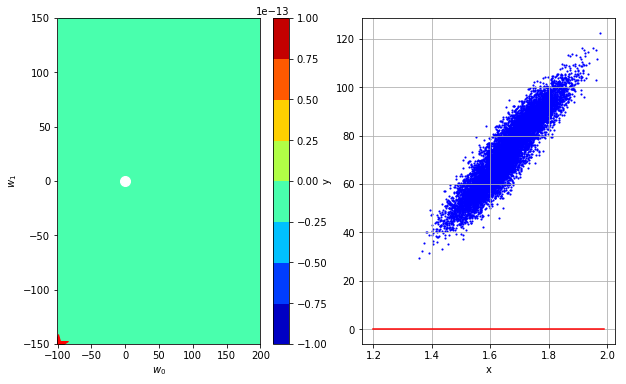

In [12]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_losses = grid_search(b, A, grid_x0, grid_x1)
    loss_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_losses)
    
    fig = gradient_descent_visualization(
        gradient_losses, gradient_xs, grid_losses, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [13]:
data = np.loadtxt("concrete_data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [14]:
b.shape, A.shape

((1030L,), (1030L, 8L))

# Running gradient descent

Fill in the learning rate

In [15]:
max_iters = 5000


gamma = 0.01#Fill in a learning rate

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/4999): loss=1561.7372033
Gradient Descent(1/4999): loss=1558.08763782
Gradient Descent(2/4999): loss=1554.52493445
Gradient Descent(3/4999): loss=1551.04692608
Gradient Descent(4/4999): loss=1547.65150163
Gradient Descent(5/4999): loss=1544.3366045
Gradient Descent(6/4999): loss=1541.10023115
Gradient Descent(7/4999): loss=1537.94042969
Gradient Descent(8/4999): loss=1534.85529847
Gradient Descent(9/4999): loss=1531.84298479
Gradient Descent(10/4999): loss=1528.90168357
Gradient Descent(11/4999): loss=1526.02963608
Gradient Descent(12/4999): loss=1523.22512875
Gradient Descent(13/4999): loss=1520.48649193
Gradient Descent(14/4999): loss=1517.81209877
Gradient Descent(15/4999): loss=1515.20036404
Gradient Descent(16/4999): loss=1512.64974307
Gradient Descent(17/4999): loss=1510.15873067
Gradient Descent(18/4999): loss=1507.72586008
Gradient Descent(19/4999): loss=1505.34970195
Gradient Descent(20/4999): loss=1503.02886339
Gradient Descent(21/4999): loss=1500.76198697


Gradient Descent(707/4999): loss=1393.64485796
Gradient Descent(708/4999): loss=1393.64038837
Gradient Descent(709/4999): loss=1393.63592993
Gradient Descent(710/4999): loss=1393.63148259
Gradient Descent(711/4999): loss=1393.62704633
Gradient Descent(712/4999): loss=1393.6226211
Gradient Descent(713/4999): loss=1393.61820687
Gradient Descent(714/4999): loss=1393.6138036
Gradient Descent(715/4999): loss=1393.60941124
Gradient Descent(716/4999): loss=1393.60502977
Gradient Descent(717/4999): loss=1393.60065915
Gradient Descent(718/4999): loss=1393.59629934
Gradient Descent(719/4999): loss=1393.5919503
Gradient Descent(720/4999): loss=1393.58761199
Gradient Descent(721/4999): loss=1393.58328438
Gradient Descent(722/4999): loss=1393.57896744
Gradient Descent(723/4999): loss=1393.57466112
Gradient Descent(724/4999): loss=1393.57036539
Gradient Descent(725/4999): loss=1393.56608021
Gradient Descent(726/4999): loss=1393.56180556
Gradient Descent(727/4999): loss=1393.55754138
Gradient Descent

Gradient Descent(2190/4999): loss=1391.24580678
Gradient Descent(2191/4999): loss=1391.24512063
Gradient Descent(2192/4999): loss=1391.24443494
Gradient Descent(2193/4999): loss=1391.2437497
Gradient Descent(2194/4999): loss=1391.24306491
Gradient Descent(2195/4999): loss=1391.24238057
Gradient Descent(2196/4999): loss=1391.24169669
Gradient Descent(2197/4999): loss=1391.24101326
Gradient Descent(2198/4999): loss=1391.24033029
Gradient Descent(2199/4999): loss=1391.23964776
Gradient Descent(2200/4999): loss=1391.23896569
Gradient Descent(2201/4999): loss=1391.23828406
Gradient Descent(2202/4999): loss=1391.23760289
Gradient Descent(2203/4999): loss=1391.23692217
Gradient Descent(2204/4999): loss=1391.2362419
Gradient Descent(2205/4999): loss=1391.23556207
Gradient Descent(2206/4999): loss=1391.2348827
Gradient Descent(2207/4999): loss=1391.23420377
Gradient Descent(2208/4999): loss=1391.2335253
Gradient Descent(2209/4999): loss=1391.23284726
Gradient Descent(2210/4999): loss=1391.23216

Gradient Descent(3555/4999): loss=1390.61594812
Gradient Descent(3556/4999): loss=1390.61565223
Gradient Descent(3557/4999): loss=1390.61535652
Gradient Descent(3558/4999): loss=1390.61506098
Gradient Descent(3559/4999): loss=1390.61476563
Gradient Descent(3560/4999): loss=1390.61447045
Gradient Descent(3561/4999): loss=1390.61417544
Gradient Descent(3562/4999): loss=1390.61388062
Gradient Descent(3563/4999): loss=1390.61358597
Gradient Descent(3564/4999): loss=1390.6132915
Gradient Descent(3565/4999): loss=1390.61299721
Gradient Descent(3566/4999): loss=1390.61270309
Gradient Descent(3567/4999): loss=1390.61240916
Gradient Descent(3568/4999): loss=1390.61211539
Gradient Descent(3569/4999): loss=1390.61182181
Gradient Descent(3570/4999): loss=1390.6115284
Gradient Descent(3571/4999): loss=1390.61123517
Gradient Descent(3572/4999): loss=1390.61094212
Gradient Descent(3573/4999): loss=1390.61064924
Gradient Descent(3574/4999): loss=1390.61035653
Gradient Descent(3575/4999): loss=1390.610

# Plotting the Error

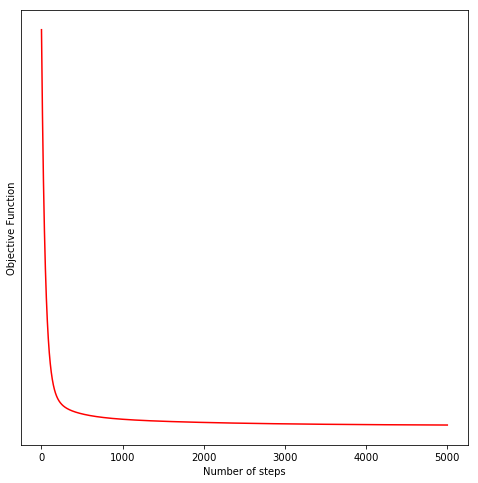

In [16]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
plt.yscale("log")
plt.plot(range(len(gradient_losses)), gradient_losses,'r')

plt.show()